<a href="https://colab.research.google.com/github/bugeki/DL/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
print("There are ", len(x_train),"images in the training dataset") 
print("There are ", len(x_test),"images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

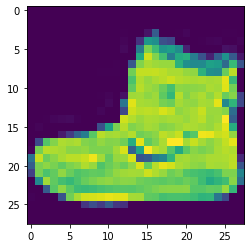

In [8]:
plt.imshow(x_train[0])


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
x_train[5].min()


0

In [10]:
x_train[5].max()


255

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

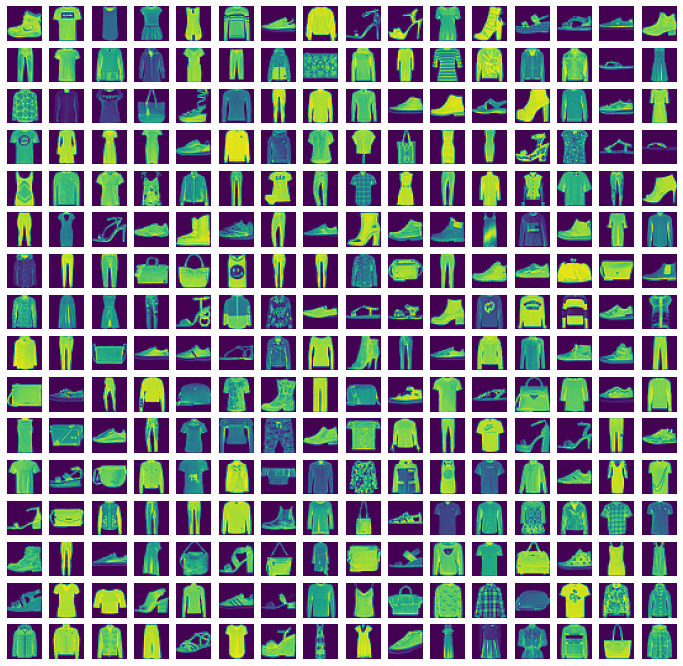

In [12]:
plt.figure(figsize= (12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i])

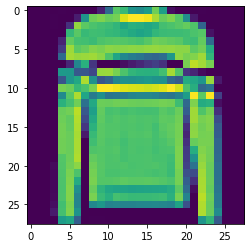

In [13]:
plt.imshow(x_train[5])


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
x_train = x_train.reshape(x_train.shape[0],28, 28,1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 13552)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [27]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 4ms/step - loss: 0.3761 - accuracy: 0.8649 - val_loss: 0.3140 - val_accuracy: 0.8845
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2538 - accuracy: 0.9090 - val_loss: 0.2896 - val_accuracy: 0.8982
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2237 - accuracy: 0.9197 - val_loss: 0.2900 - val_accuracy: 0.9030
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2055 - accuracy: 0.9270 - val_loss: 0.2741 - val_accuracy: 0.9097
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1915 - accuracy: 0.9330 - val_loss: 0.2790 - val_accuracy: 0.9127
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1807 - accuracy: 0.9377 - val_loss: 0.3081 - val_accuracy: 0.9091


In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  0.376097  0.864933  0.313974        0.8845
1  0.253801  0.908967  0.289576        0.8982
2  0.223715  0.919750  0.290026        0.9030
3  0.205460  0.927017  0.274068        0.9097
4  0.191469  0.932950  0.279014        0.9127

**TASK 7: Plot values of metrics you used in your model.**

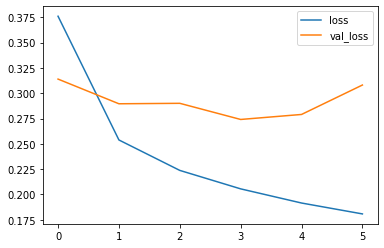

In [30]:
summary[["loss", "val_loss"]].plot();

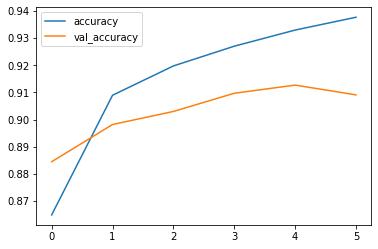

In [31]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Prediction

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix


In [33]:
pred_prob = model.predict(x_test)

In [34]:
y_pred = np.argmax(pred_prob, axis=1)

In [35]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.97      0.98      0.98      1000
           2       0.91      0.80      0.85      1000
           3       0.92      0.89      0.90      1000
           4       0.82      0.90      0.86      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.77      0.76      1000
           7       0.93      0.99      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [39]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
print(confusion_matrix(y_test, y_pred))

[[865   3   8  21   4   2  91   0   6   0]
 [  2 981   2   8   4   0   1   0   2   0]
 [ 19   2 804   7  81   1  85   0   1   0]
 [ 10  20   4 894  48   0  23   0   1   0]
 [  1   1  25  18 896   1  58   0   0   0]
 [  0   0   0   0   0 964   0  26   2   8]
 [ 93   2  40  26  56   0 767   0  16   0]
 [  0   0   0   0   0   3   0 986   0  11]
 [  3   1   1   2   3   2   4   1 983   0]
 [  0   0   0   0   0   3   0  46   0 951]]


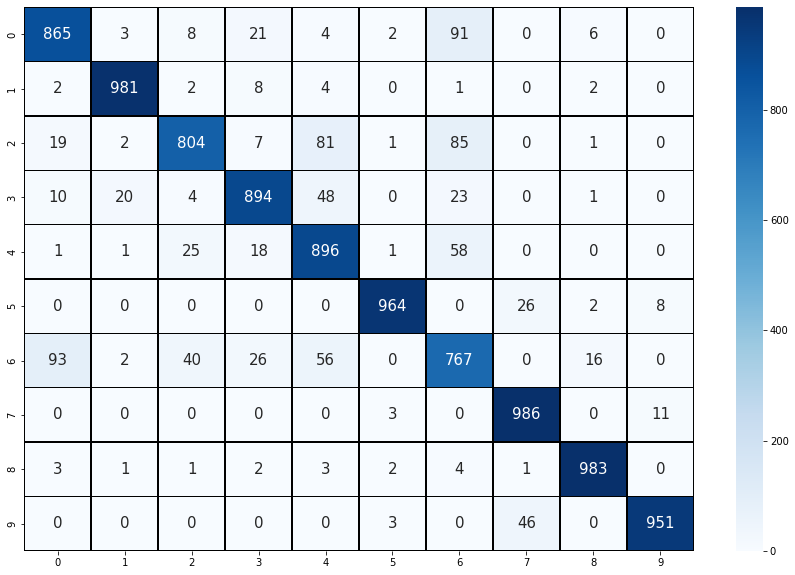

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [42]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3081093728542328
Test accuracy: 0.9090999960899353


In [53]:
my_image = x_test[10]

In [54]:
my_image.shape

(28, 28, 1)

In [55]:
image_prediction=model.predict(my_image.reshape(1,28,28,1))


In [56]:
np.argmax(image_prediction, axis=1)


array([4])

In [57]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'Coat'

TypeError: ignored

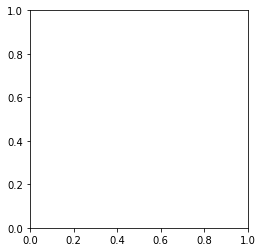

In [58]:
plt.imshow(my_image)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___